<a href="https://colab.research.google.com/github/Aya-Jafar/Customer-churn-prediction/blob/main/customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business understanding

**Customer Churn prediction** means knowing which customers are likely to leave or unsubscribe from your service. For many companies, this is an important prediction because acquiring new customers often costs more than retaining existing ones (about 5-10x more expensive) . Once a company identified customers at risk of churn, it need to know exactly what marketing efforts you should make with each customer to maximize their likelihood of staying

The main goal of Customer Churn Prediction  is to reduce churn and increase business profits

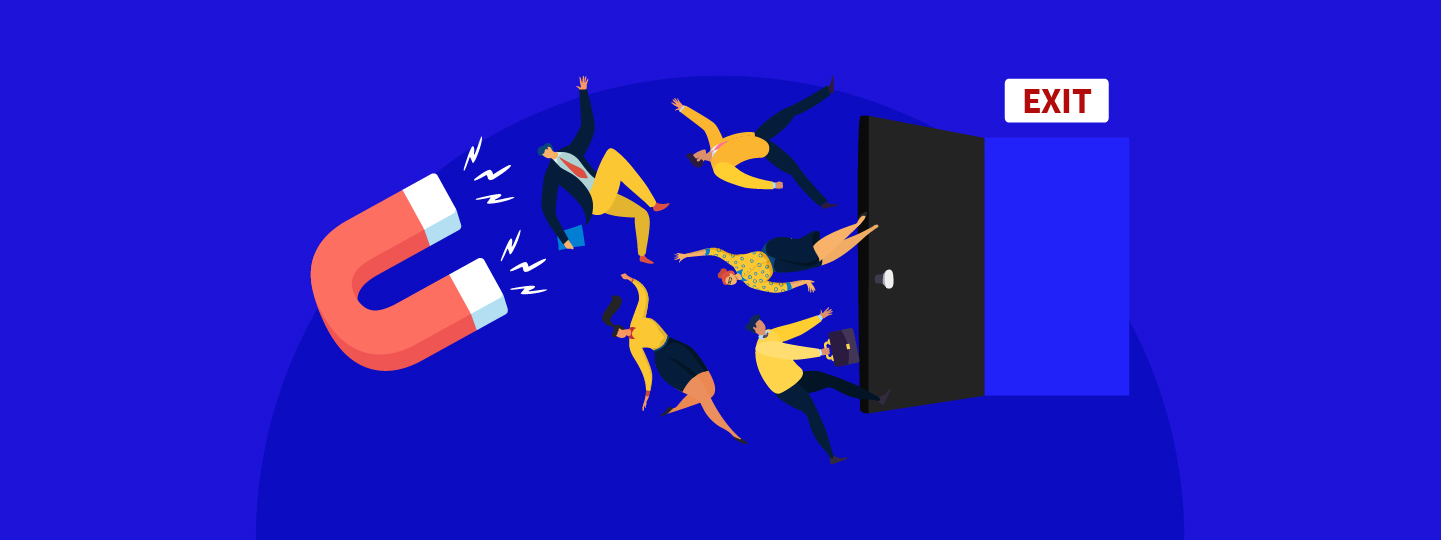

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
files.upload()

# Reading the dataset

In [3]:
df = pd.read_csv('churn-prediction.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39.0,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35.0,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1,0,92888.52,1


# Data understanding 

- RowNumber: corresponds to the record (row) number and has no effect on the output.
CustomerId—contains random values and has no effect on customer leaving  the bank.
- Surname: the surname of a customer has no impact on their decision to leave the bank.

- CreditScore:can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

- Geography:a customer’s location can affect their decision to leave the bank.
Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.

- Age: this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

- Tenure : refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- Balance : also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- NumOfProducts: refers to the number of products that a customer has purchased through the bank.
- HasCrCard : denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- IsActiveMember : active customers are less likely to leave the bank.
- EstimatedSalary : as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- Exited : whether or not the customer left the bank.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              9930 non-null   float64
 7   Tenure           10000 non-null  int64  
 8   Balance          9900 non-null   float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


# Descriptive analysis of the dataset

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,9930.0,3.891944e+01,10.487712,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,9900.0,7.644852e+04,62417.266826,0.00,0.00,9.708963e+04,1.276651e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


# Data exploring and preproccessing 

## Dropping unneccessary columns

In [6]:
df.drop(['Surname','CustomerId','RowNumber','Geography'],axis=1,inplace=True)

In [7]:
sns.set_theme()

<ipython-input-8-bb6a99ec17be>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax1)


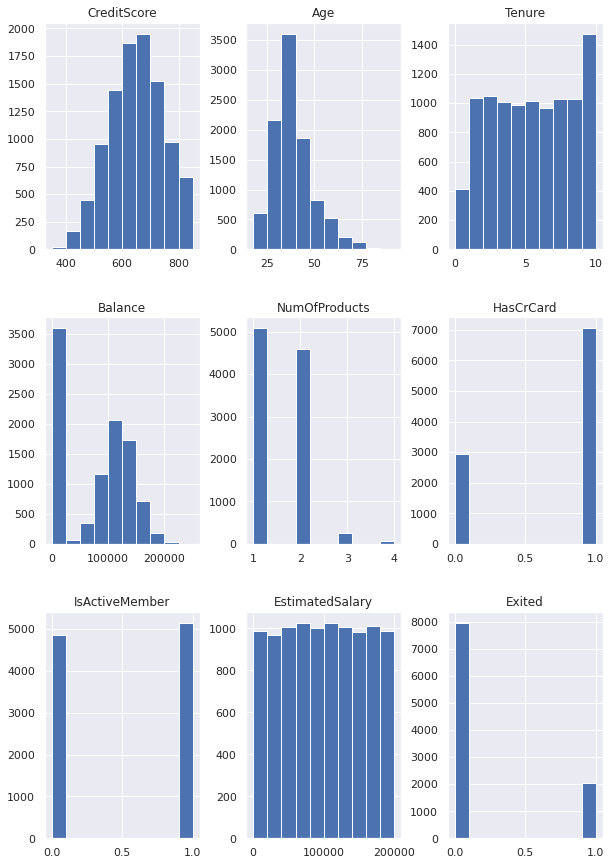

In [8]:
fig1, ax1 = plt.subplots(figsize= (10, 15) )
df.hist(ax = ax1)
plt.show()

The hist chart shows us that most of the features has a normal distribution , Except some features that has a uniform distribution 

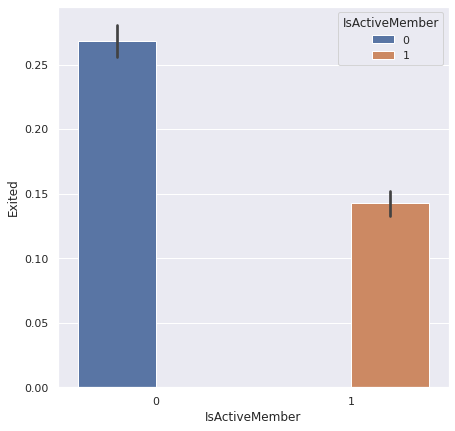

In [9]:
fig, ax =plt.subplots(1,1,figsize=(7,7))
sns.barplot(x=df['IsActiveMember'], 
            y=df['Exited'],
            hue=df['IsActiveMember'],
            ax=ax)
plt.show()

Customers who were active members were more likely to churn 

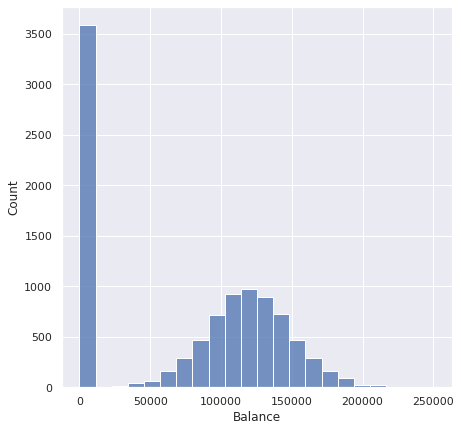

In [10]:
fig, ax =plt.subplots(1,1,figsize=(7,7))
sns.histplot(data=df,x='Balance',ax=ax)
plt.show()

The bar plot shows that there's a high count of customers with zero balance account , Which may have a relationship with why majority of the customers are churned from the Bank

In [11]:
grouped_gender = df.groupby('Gender')['Exited'].aggregate(Count ='value_counts')
grouped_gender

Count
Gender Exited       
Female 0        3404
       1        1139
Male   0        4559
       1         898

In [12]:
grouped_gender = grouped_gender.pivot_table(values = 'Count', index = 'Gender', columns = ['Exited'])
grouped_gender 

Exited,0,1
Gender,,
Female,3404,1139
Male,4559,898


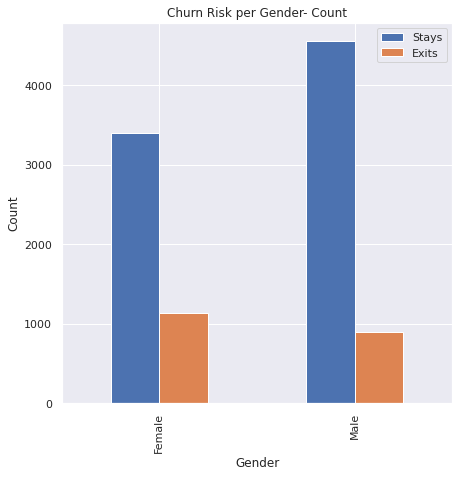

In [13]:
labels= ['Stays', 'Exits']

fig, ax1 = plt.subplots(1, 1, figsize=(7, 7))

grouped_gender.plot(
        kind='bar',
        ax=ax1)

ax1.legend(labels)

ax1.set_title('Churn Risk per Gender- Count')
ax1.set_ylabel('Count',size=12)
ax1.set_xlabel('Gender', size=12)

plt.show()

## Encoding

In [14]:
df['Gender'] = df['Gender'].map({'Male':0,'Female':1})

## Handling missing values using KNN imputer 

In [15]:
df.isnull().sum()

CreditScore          0
Gender               0
Age                 70
Tenure               0
Balance            100
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

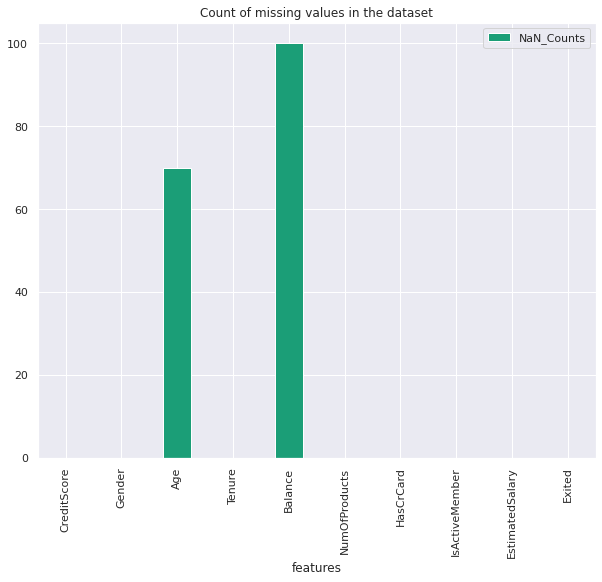

In [16]:
missing = pd.DataFrame(
    {
        "features": [ i for i in df.columns],
        "NaN_Counts": [ df[i].isna().sum() for i in df.columns ],
    }
)
fig , ax = plt.subplots(figsize=(10,8))
ax.set_title('Count of missing values in the dataset')
missing.plot(kind='bar',x="features",colormap='Dark2',ax=ax)
plt.show()

In [17]:
from sklearn import impute

In [18]:
# initialize the KNNImputer
imp = impute.KNNImputer()
# Fit impute on the dataset 
imp.fit(df)
# Imputation of missing values
new_dataset_imp = imp.transform(df)

df = pd.DataFrame(new_dataset_imp,columns=df.columns)
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,1.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0
1,608.0,1.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,502.0,1.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0
3,699.0,1.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0
4,850.0,1.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0
...,...,...,...,...,...,...,...,...,...,...
9995,771.0,0.0,39.0,5.0,0.00,2.0,1.0,0.0,96270.64,0.0
9996,516.0,0.0,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77,0.0
9997,709.0,1.0,36.0,7.0,0.00,1.0,0.0,1.0,42085.58,1.0
9998,772.0,0.0,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52,1.0


In [19]:
df.isnull().sum()

CreditScore        0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### How did KNN imputer work ? 

Simpler example of how KNN imputes missing values :

In [20]:
example_ds =  [ [1, 2, np.nan], 
                [100,200,90],
                [1, 3, 3], 
                [1, 2, 7]]
imputer = impute.KNNImputer(n_neighbors=2) # 10 / 2
imputer.fit_transform(example_ds)

array([[  1.,   2.,   5.],
       [100., 200.,  90.],
       [  1.,   3.,   3.],
       [  1.,   2.,   7.]])

it finds the k nearset neighbours for the missing value based on it's features and then calculates the mean between the neighbours to estimate the missing value .

The defualt n_neighbours hyperparameter equals to 5 .
So, it finds the 5 nearset neighbours for the row containing the missing value and then impute it using the mean of this neighbours

for example , if age has a missing value then KNN imputer will find the nearset neighbours for other of the features and use it to estimate age 

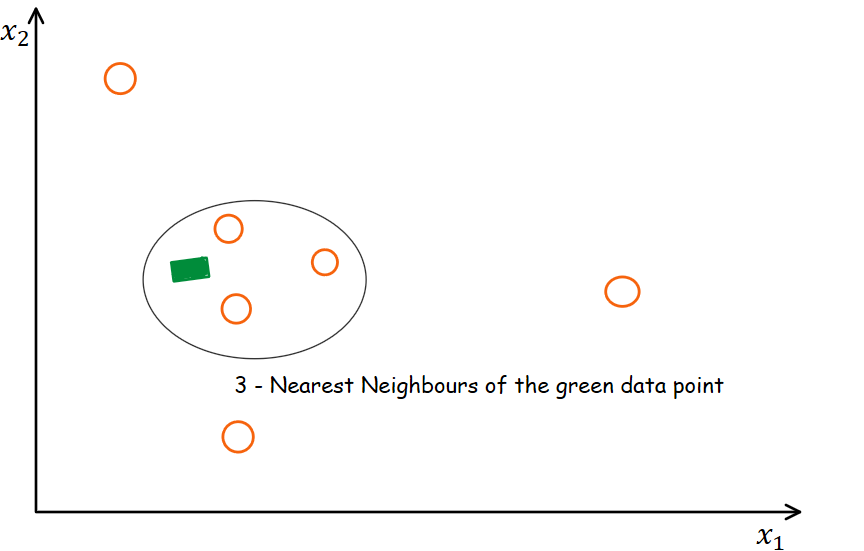

In [21]:
x = df.drop(columns=['Exited'])
y = df.Exited
x

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619.0,1.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,608.0,1.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,502.0,1.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,699.0,1.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,850.0,1.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10
...,...,...,...,...,...,...,...,...,...
9995,771.0,0.0,39.0,5.0,0.00,2.0,1.0,0.0,96270.64
9996,516.0,0.0,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77
9997,709.0,1.0,36.0,7.0,0.00,1.0,0.0,1.0,42085.58
9998,772.0,0.0,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52


## Handling imbalace dataset using SMOTE 

Imbalanced dataset can make the model biased towards the majority class , So balancing the dataset can improve the model performance to make a fair decision

SMOTE work by synthesizing/genereting samples from the minority class until the size of minority becomes the same as the majority class .

The synthetic instances are generated as a combination of the two chosen neighbours from the minority class

SMOTE formula :

**X' = X + rand(0,1) * | X - X*k* |**

where :

- X' is the new generated sample,

- X is a random sample from the minority class,

- Xk is the nearest neighbours for X,

- | X - X*k* | is the distance between X and Xk

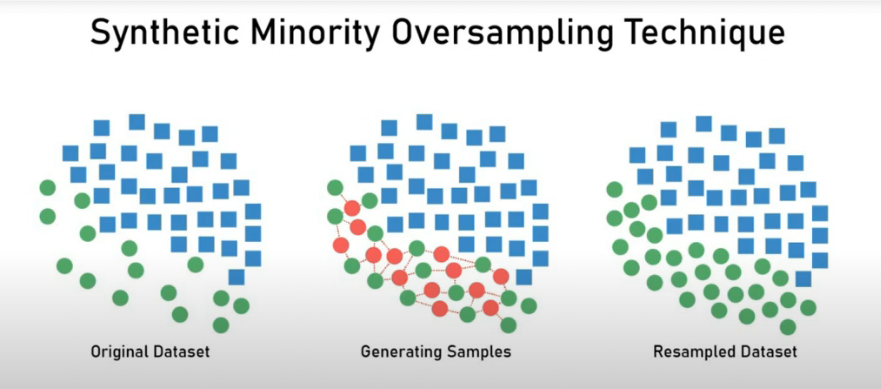

In [22]:
df.Exited.value_counts()

0.0    7963
1.0    2037
Name: Exited, dtype: int64

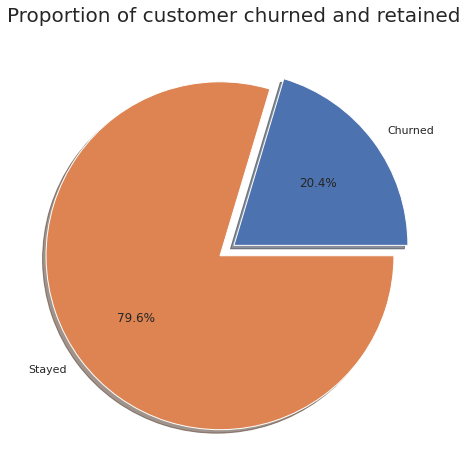

In [23]:
counts = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
fig1, ax1 = plt.subplots(figsize=(10, 8))
plt.title("Proportion of customer churned and retained", size = 20)
plt.pie(counts,
        autopct='%1.1f%%',
        shadow= True, 
        explode = (0, 0.1),
        labels = ('Churned', 'Stayed'))
plt.show()

In [24]:
from imblearn.over_sampling import SMOTE

from imblearn.over_sampling import SMOTENC

smote = SMOTENC( categorical_features = [1, 6, 7] ,random_state=1)

# fit predictor and target variable
X1, y1 = smote.fit_resample(x, y)

print(f'Original dataset shape {y.value_counts()}')
print(f'Resample dataset shape {y1.value_counts()}')

Original dataset shape 0.0    7963
1.0    2037
Name: Exited, dtype: int64
Resample dataset shape 1.0    7963
0.0    7963
Name: Exited, dtype: int64


In [25]:
balanced_df = X1.join(y1)
balanced_df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.000000,1.0,42.000000,2.000000,0.000000,1.000000,1.0,1.0,101348.880000,1.0
1,608.000000,1.0,41.000000,1.000000,83807.860000,1.000000,0.0,1.0,112542.580000,0.0
2,502.000000,1.0,42.000000,8.000000,159660.800000,3.000000,1.0,0.0,113931.570000,1.0
3,699.000000,1.0,39.000000,1.000000,0.000000,2.000000,0.0,0.0,93826.630000,0.0
4,850.000000,1.0,43.000000,2.000000,125510.820000,1.000000,1.0,1.0,79084.100000,0.0
...,...,...,...,...,...,...,...,...,...,...
15921,458.109899,1.0,44.268086,3.000000,104455.048209,1.847518,1.0,1.0,183689.618873,1.0
15922,632.105684,0.0,34.934108,4.195607,174531.728512,1.804393,1.0,0.0,172868.200417,1.0
15923,687.280148,1.0,30.540814,4.000000,78824.350975,1.420222,1.0,0.0,121731.816514,1.0
15924,636.767407,1.0,28.669566,3.330434,0.000000,1.667391,1.0,1.0,100398.241511,1.0


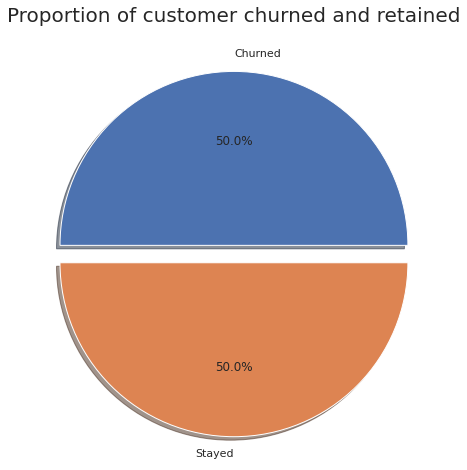

In [26]:
counts = [balanced_df.Exited[balanced_df['Exited']==1].count(), balanced_df.Exited[balanced_df['Exited']==0].count()]
fig1, ax1 = plt.subplots(figsize=(10, 8))
plt.title("Proportion of customer churned and retained", size = 20)
plt.pie(counts,
        autopct='%1.1f%%',
        shadow= True, 
        explode = (0, 0.1),
        labels = ('Churned', 'Stayed'))
plt.show()

## Checking Outliers

In [27]:
def find_upper_and_lower_fence(dataset,feature):
    Q1 = dataset[feature].quantile(0.25)
    Q3 = dataset[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - (1.5 * IQR)
    upper_fence = Q3 + (1.5 * IQR)
    return [lower_fence,upper_fence]

In [28]:
def find_outliers(df,feature,func):
    lower,upper = func(df,feature)
    outliers =  df[ (df[feature] < lower ) | (df[feature] > upper) ]
    print("{:30}{}".format(feature,outliers.shape[0]))

for i in balanced_df.columns:
    find_outliers(balanced_df, i ,find_upper_and_lower_fence)

CreditScore                   38
Gender                        0
Age                           248
Tenure                        0
Balance                       0
NumOfProducts                 136
HasCrCard                     3887
IsActiveMember                0
EstimatedSalary               0
Exited                        0


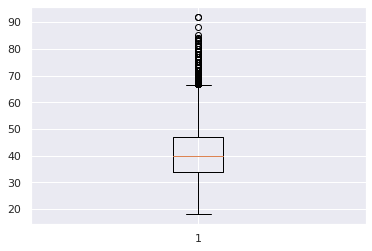

In [29]:
plt.boxplot(balanced_df['Age'])
plt.show()

In [30]:
# Handling Age outliers 
lower , upper = find_upper_and_lower_fence(balanced_df,'Age')
out = (balanced_df['Age'] <= lower ) | (balanced_df['Age'] >= upper) 
balanced_df["Age"] = np.where(out , balanced_df["Age"].median() , balanced_df['Age'])

# Handling NumOfProducts outliers                
lower , upper = find_upper_and_lower_fence(balanced_df,'NumOfProducts')
out = (balanced_df['NumOfProducts'] < lower ) | (balanced_df['NumOfProducts'] > upper) 
balanced_df["NumOfProducts"] = np.where(out, balanced_df["NumOfProducts"].median() ,balanced_df['NumOfProducts'])

we use median to replace outliers instead of mean so it won't be affected

In [31]:
for i in balanced_df.columns:
    find_outliers(balanced_df, i ,find_upper_and_lower_fence)

CreditScore                   38
Gender                        0
Age                           2
Tenure                        0
Balance                       0
NumOfProducts                 0
HasCrCard                     3887
IsActiveMember                0
EstimatedSalary               0
Exited                        0


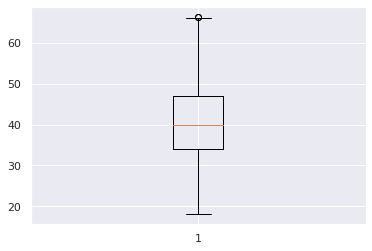

In [32]:
plt.boxplot(balanced_df['Age'])
plt.show()

## Select X and Y from the balanced dataset

In [33]:
x = balanced_df.drop(columns=['Exited'])
y = balanced_df.Exited

In [34]:
from sklearn import preprocessing
from sklearn import (
    linear_model,
    neighbors,
    ensemble,
    svm,
)
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn import model_selection
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Scalling

In [35]:
from sklearn import preprocessing
x_normalizer = preprocessing.StandardScaler()
x_normalizer.fit( x )
x_norm = x_normalizer.transform( x )

# Modeling 

## Train all of the data using cross validation

In [36]:
def train_test_split_cv(x, y, train_indices, test_indices):
    return x[train_indices], x[test_indices], y[train_indices], y[test_indices]

In [37]:
f1_score = []
models = []
cv_mean = []

In [38]:
def cross_validation(clf):
  stratified_k_fold = model_selection.StratifiedKFold(
      n_splits=10
  )  # splits the data into 10 splits, using 9 for training and 1 for testing in each iteration

  for train_indices, test_indices in stratified_k_fold.split(x_norm, y):  # y is needed here for stratification, similar to stratify = y.
      # Split data using our predefined function
      x_train, x_test, y_train, y_test = train_test_split_cv(x_norm, y, train_indices, test_indices)

      # Train model
      clf.fit(x_train, y_train)

      # Predict using test set
      y_pred = clf.predict(x_test)

      # Calculate scores
      f1_score.append(metrics.f1_score(y_test, y_pred))

  clf = str(clf) 
  models.append(clf[:clf.find('(')])
  
  cv_mean.append(np.mean(f1_score))


In [39]:
cross_validation( linear_model.LogisticRegression() )
cross_validation( svm.SVC(kernel='rbf') )
cross_validation( tree.DecisionTreeClassifier(random_state=1) )
cross_validation( neighbors.KNeighborsClassifier() )
cross_validation( GradientBoostingClassifier(random_state=1) )
cross_validation( ensemble.RandomForestClassifier(random_state= 1) )
cross_validation( XGBClassifier() )

In [40]:
scores_df = pd.DataFrame( {'f1 mean': cv_mean ,'model':models})
scores_df

,f1 mean,model
0,0.741993,LogisticRegression
1,0.768458,SVC
2,0.786740,DecisionTreeClassifier
3,0.790510,KNeighborsClassifier
4,0.804751,GradientBoostingClassifier
5,0.814853,RandomForestClassifier
6,0.821736,XGBClassifier


choose the best models that performed well on the whole dataset and then train it again using the traditional split to check overfitting and tune it more to give better result 

## Split dataset into train ,test

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.1, random_state=1 , stratify=y ) 

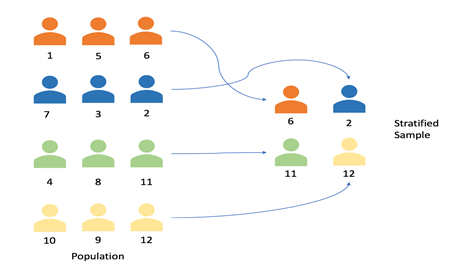

Training shape : (14333, 9)         Test shape : (1593, 9)


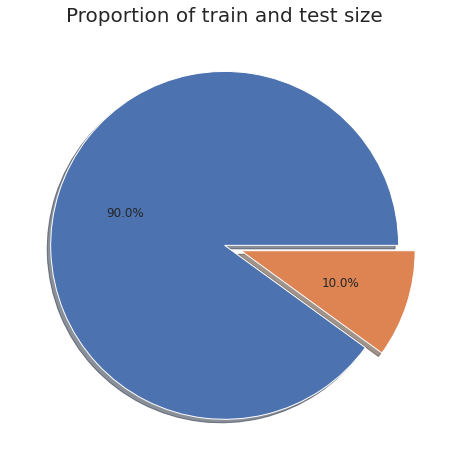

In [42]:
print(f'Training shape : {x_train.shape} \
        Test shape : {x_test.shape}'
)
fig1, ax1 = plt.subplots(figsize=(10, 8))
plt.title("Proportion of train and test size", size = 20)

plt.pie([x_train.shape[0], x_test.shape[0]] ,
        autopct='%1.1f%%',
        shadow= True,
        explode = (0, 0.1)
)
plt.show()

In [43]:
metric = {'model':[],'Train f1':[],'Test f1':[]}

In [44]:
def fit_pred(clf):
  '''
  function to perform the fit and predict proccess for any model 
  and prints the classification report for both test and train dataset
  '''
  clf.fit(x_train,y_train) 
  print('Train Metric'.center(60, " "))
  print('-'*60)
  train_pred = clf.predict(x_train)
  print(metrics.classification_report(y_train,train_pred))

  pred = clf.predict(x_test)
  print('Test Metric'.center(60, " "))
  print('-'*60)
  print(metrics.classification_report(y_test,pred))

  cm = metrics.confusion_matrix(y_test, pred)
  metrics.ConfusionMatrixDisplay(cm, display_labels = balanced_df.Exited.unique()).plot()
  
  metric['Test f1'].append(metrics.f1_score(y_test,pred))
  metric['Train f1'].append(metrics.f1_score(y_train,train_pred))

  clf = str(clf)
  metric['model'].append(clf[:clf.find('(')])

                        Train Metric                        
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.87      7167
         1.0       0.86      0.87      0.87      7166

    accuracy                           0.87     14333
   macro avg       0.87      0.87      0.87     14333
weighted avg       0.87      0.87      0.87     14333

                        Test Metric                         
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.82      0.79      0.81       796
         1.0       0.80      0.83      0.81       797

    accuracy                           0.81      1593
   macro avg       0.81      0.81      0.81      1593
weighted avg       0.81      0.81      0.81      1593



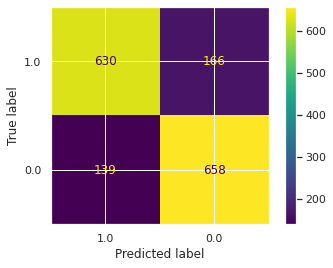

In [46]:
fit_pred(neighbors.KNeighborsClassifier())

                        Train Metric                        
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89      7167
         1.0       0.91      0.87      0.89      7166

    accuracy                           0.89     14333
   macro avg       0.89      0.89      0.89     14333
weighted avg       0.89      0.89      0.89     14333

                        Test Metric                         
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.89       796
         1.0       0.90      0.87      0.88       797

    accuracy                           0.89      1593
   macro avg       0.89      0.89      0.89      1593
weighted avg       0.89      0.89      0.89      1593



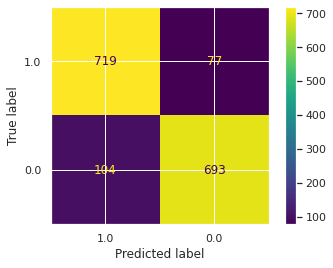

In [47]:
fit_pred(GradientBoostingClassifier(random_state=1))

                        Train Metric                        
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7167
         1.0       1.00      1.00      1.00      7166

    accuracy                           1.00     14333
   macro avg       1.00      1.00      1.00     14333
weighted avg       1.00      1.00      1.00     14333

                        Test Metric                         
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89       796
         1.0       0.90      0.86      0.88       797

    accuracy                           0.88      1593
   macro avg       0.89      0.88      0.88      1593
weighted avg       0.89      0.88      0.88      1593



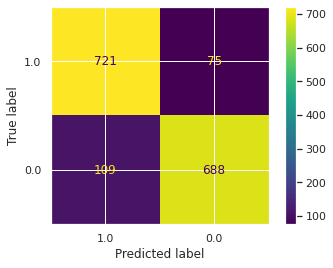

In [48]:
fit_pred(ensemble.RandomForestClassifier(random_state= 1 ))

Obvious overfitting ☝

                        Train Metric                        
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.85      0.86      0.85      7167
         1.0       0.86      0.84      0.85      7166

    accuracy                           0.85     14333
   macro avg       0.85      0.85      0.85     14333
weighted avg       0.85      0.85      0.85     14333

                        Test Metric                         
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85       796
         1.0       0.85      0.84      0.85       797

    accuracy                           0.85      1593
   macro avg       0.85      0.85      0.85      1593
weighted avg       0.85      0.85      0.85      1593



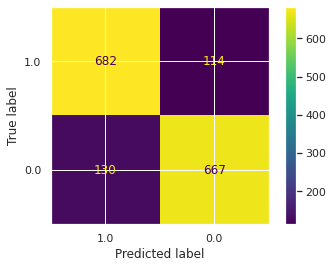

In [49]:
fit_pred(
    ensemble.RandomForestClassifier(
        ccp_alpha=0.001,
        random_state= 1 
))

by adding ccp_alpha hyperparameter, the overfitting is signicantly reduced !

As alpha increases, more of the tree is pruned and nodes gets removed, thus creating a tree that generalizes better.

In [50]:
np.round(pd.DataFrame(metric),2)

,model,Train f1,Test f1
0,DecisionTreeClassifier,0.85,0.85
1,KNeighborsClassifier,0.87,0.81
2,GradientBoostingClassifier,0.89,0.88
3,RandomForestClassifier,1.00,0.88
4,RandomForestClassifier,0.85,0.85


## Improve model performance by hyperparamer tunning 

n_neighbors = 1 ===== Train : 1.0 ===== Test : 0.81
n_neighbors = 2 ===== Train : 0.9 ===== Test : 0.76
n_neighbors = 3 ===== Train : 0.9 ===== Test : 0.81
n_neighbors = 4 ===== Train : 0.86 ===== Test : 0.79
n_neighbors = 5 ===== Train : 0.87 ===== Test : 0.81
n_neighbors = 6 ===== Train : 0.85 ===== Test : 0.79
n_neighbors = 7 ===== Train : 0.85 ===== Test : 0.8
n_neighbors = 8 ===== Train : 0.84 ===== Test : 0.79
n_neighbors = 9 ===== Train : 0.84 ===== Test : 0.8
n_neighbors = 10 ===== Train : 0.83 ===== Test : 0.8
n_neighbors = 11 ===== Train : 0.83 ===== Test : 0.8
n_neighbors = 12 ===== Train : 0.82 ===== Test : 0.79
n_neighbors = 13 ===== Train : 0.82 ===== Test : 0.8
n_neighbors = 14 ===== Train : 0.81 ===== Test : 0.79
n_neighbors = 15 ===== Train : 0.82 ===== Test : 0.8
n_neighbors = 16 ===== Train : 0.81 ===== Test : 0.79
n_neighbors = 17 ===== Train : 0.82 ===== Test : 0.8
n_neighbors = 18 ===== Train : 0.81 ===== Test : 0.8
n_neighbors = 19 ===== Train : 0.81 ===== Test :

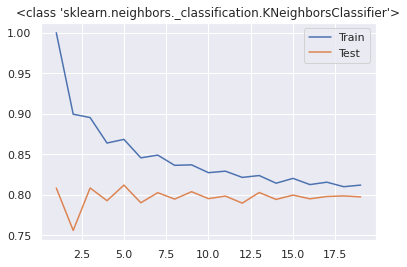

In [51]:
def hyperparameter_tunner(estimator = None, hyperpar_range=None ,hyperpar=None):
  '''
  takes a model, hyperparameter range and the hyperparameter 
  prints the train and test scors (F1 score) and then plot it to check overfitting 
  '''
  train_scores = []
  test_scores = []

  for i in range(1,hyperpar_range):
    # configure the model
    model = estimator(**{hyperpar:i})
    # fit model on the training dataset
    model.fit(x_train, y_train)
    # evaluate on the train dataset
    train_pred = model.predict(x_train)
    train_acc = metrics.f1_score(y_train, train_pred)
    train_scores.append(train_acc)

    # evaluate on the test dataset
    test_pred = model.predict(x_test)
    test_acc = metrics.f1_score(y_test, test_pred)
    test_scores.append(test_acc)
    # summarize progress
    print(f'{hyperpar} = {i} ===== Train : {round(train_acc,2)} ===== Test : {round(test_acc,2)}')

  plt.title(estimator)
  plt.plot([i for i in range(1,hyperpar_range)], train_scores, label='Train')
  plt.plot([i for i in range(1,hyperpar_range)], test_scores, label='Test')
  plt.legend()
  plt.show()

hyperparameter_tunner(estimator = neighbors.KNeighborsClassifier , 
                      hyperpar_range = 20 , 
                      hyperpar = 'n_neighbors')

underfitting ↘

max_depth = 1 ===== Train : 0.72 ===== Test : 0.72
max_depth = 2 ===== Train : 0.72 ===== Test : 0.72
max_depth = 3 ===== Train : 0.79 ===== Test : 0.79
max_depth = 4 ===== Train : 0.82 ===== Test : 0.81
max_depth = 5 ===== Train : 0.84 ===== Test : 0.83
max_depth = 6 ===== Train : 0.84 ===== Test : 0.83
max_depth = 7 ===== Train : 0.85 ===== Test : 0.83
max_depth = 8 ===== Train : 0.86 ===== Test : 0.84
max_depth = 9 ===== Train : 0.87 ===== Test : 0.84
max_depth = 10 ===== Train : 0.88 ===== Test : 0.84
max_depth = 11 ===== Train : 0.89 ===== Test : 0.84
max_depth = 12 ===== Train : 0.91 ===== Test : 0.85
max_depth = 13 ===== Train : 0.92 ===== Test : 0.86
max_depth = 14 ===== Train : 0.94 ===== Test : 0.85
max_depth = 15 ===== Train : 0.96 ===== Test : 0.85
max_depth = 16 ===== Train : 0.97 ===== Test : 0.85
max_depth = 17 ===== Train : 0.98 ===== Test : 0.84
max_depth = 18 ===== Train : 0.98 ===== Test : 0.84
max_depth = 19 ===== Train : 0.99 ===== Test : 0.84


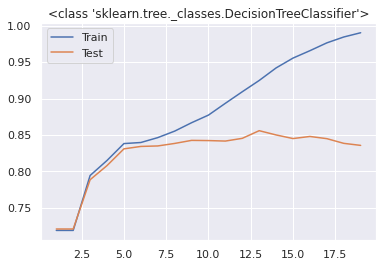

In [52]:
hyperparameter_tunner(estimator = tree.DecisionTreeClassifier , 
                      hyperpar_range = 20 , 
                      hyperpar = 'max_depth')

We can observe that the overfitting started when max depth eaquels to 10 or less .

So , we can choose to tune this hyper parameter in a way that train and test score > train score OR test score is close enough to the train score

                        Train Metric                        
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85      7167
         1.0       0.87      0.83      0.85      7166

    accuracy                           0.85     14333
   macro avg       0.85      0.85      0.85     14333
weighted avg       0.85      0.85      0.85     14333

                        Test Metric                         
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84       796
         1.0       0.86      0.82      0.84       797

    accuracy                           0.84      1593
   macro avg       0.84      0.84      0.84      1593
weighted avg       0.84      0.84      0.84      1593



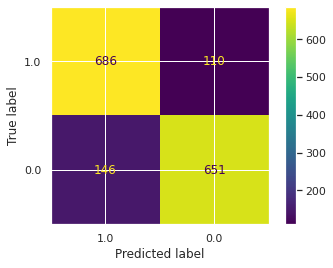

In [53]:
fit_pred(tree.DecisionTreeClassifier(max_depth = 7 ,random_state=1))

max_depth = 1 ===== Train : 0.72 ===== Test : 0.72
max_depth = 2 ===== Train : 0.77 ===== Test : 0.77
max_depth = 3 ===== Train : 0.82 ===== Test : 0.82
max_depth = 4 ===== Train : 0.83 ===== Test : 0.82
max_depth = 5 ===== Train : 0.85 ===== Test : 0.84
max_depth = 6 ===== Train : 0.85 ===== Test : 0.84
max_depth = 7 ===== Train : 0.86 ===== Test : 0.85
max_depth = 8 ===== Train : 0.87 ===== Test : 0.85
max_depth = 9 ===== Train : 0.88 ===== Test : 0.85
max_depth = 10 ===== Train : 0.89 ===== Test : 0.85
max_depth = 11 ===== Train : 0.91 ===== Test : 0.86
max_depth = 12 ===== Train : 0.93 ===== Test : 0.86
max_depth = 13 ===== Train : 0.95 ===== Test : 0.87
max_depth = 14 ===== Train : 0.97 ===== Test : 0.87


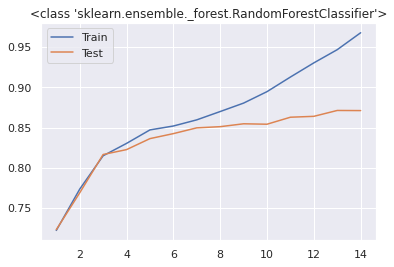

In [54]:
hyperparameter_tunner(estimator = ensemble.RandomForestClassifier , 
                      hyperpar_range = 15 , 
                      hyperpar = 'max_depth')

we can stop when max depth is between (5-10)

                        Train Metric                        
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.85      0.86      0.85      7167
         1.0       0.85      0.85      0.85      7166

    accuracy                           0.85     14333
   macro avg       0.85      0.85      0.85     14333
weighted avg       0.85      0.85      0.85     14333

                        Test Metric                         
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.84      0.85      0.85       796
         1.0       0.85      0.84      0.84       797

    accuracy                           0.84      1593
   macro avg       0.84      0.84      0.84      1593
weighted avg       0.84      0.84      0.84      1593



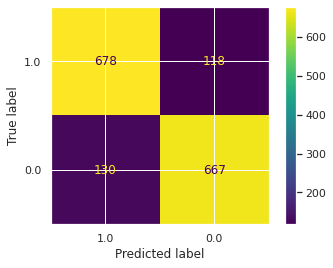

In [55]:
fit_pred(
    ensemble.RandomForestClassifier(
        max_depth =7,
        ccp_alpha=0.001,
        random_state= 1 
))

                        Train Metric                        
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89      7167
         1.0       0.91      0.86      0.88      7166

    accuracy                           0.89     14333
   macro avg       0.89      0.89      0.89     14333
weighted avg       0.89      0.89      0.89     14333

                        Test Metric                         
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89       796
         1.0       0.90      0.87      0.89       797

    accuracy                           0.89      1593
   macro avg       0.89      0.89      0.89      1593
weighted avg       0.89      0.89      0.89      1593



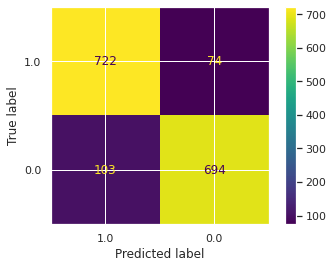

In [59]:
fit_pred(XGBClassifier())

max_depth = 1 ===== Train : 0.83 ===== Test : 0.82
max_depth = 2 ===== Train : 0.87 ===== Test : 0.87
max_depth = 3 ===== Train : 0.89 ===== Test : 0.88
max_depth = 4 ===== Train : 0.9 ===== Test : 0.89
max_depth = 5 ===== Train : 0.91 ===== Test : 0.89
max_depth = 6 ===== Train : 0.93 ===== Test : 0.89
max_depth = 7 ===== Train : 0.94 ===== Test : 0.9
max_depth = 8 ===== Train : 0.97 ===== Test : 0.89
max_depth = 9 ===== Train : 0.98 ===== Test : 0.9
max_depth = 10 ===== Train : 1.0 ===== Test : 0.9
max_depth = 11 ===== Train : 1.0 ===== Test : 0.89
max_depth = 12 ===== Train : 1.0 ===== Test : 0.88
max_depth = 13 ===== Train : 1.0 ===== Test : 0.89
max_depth = 14 ===== Train : 1.0 ===== Test : 0.89


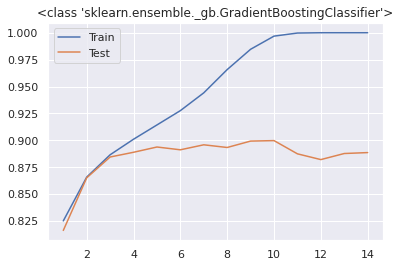

In [56]:
hyperparameter_tunner(estimator = GradientBoostingClassifier , 
                      hyperpar_range = 15 , 
                      hyperpar = 'max_depth')

                        Train Metric                        
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93      7167
         1.0       0.95      0.90      0.93      7166

    accuracy                           0.93     14333
   macro avg       0.93      0.93      0.93     14333
weighted avg       0.93      0.93      0.93     14333

                        Test Metric                         
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90       796
         1.0       0.93      0.87      0.90       797

    accuracy                           0.90      1593
   macro avg       0.90      0.90      0.90      1593
weighted avg       0.90      0.90      0.90      1593



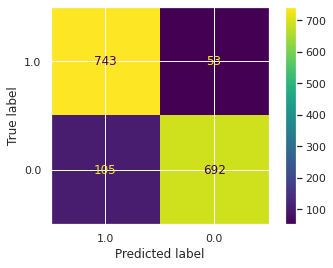

In [57]:
fit_pred(GradientBoostingClassifier(
    max_depth=6,
    random_state=1))

both GradientBoostingClassifier and XGboost performs the best result after many trails and tunning 

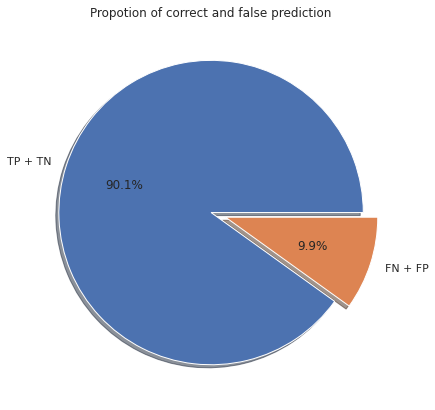

In [58]:
TP_TN = 1435
FN_FT = 158
fig, ax = plt.subplots(figsize=(7,7))
ax.set_title('Propotion of correct and false prediction')
plt.pie([TP_TN,FN_FT],
        autopct='%1.1f%%',
        shadow= True, 
        explode = (0, 0.1),
        labels = ('TP + TN', 'FN + FP')
        )
plt.show()